In [1]:
# Set up and load data
# Includes
import sys
import os
import numpy as np
import json
import os


# Setup paths containing utility
curr_folder = os.getcwd()
sys.path.insert(0, os.path.join(curr_folder,'../app'))

# Utils imports for loading data
from utils import save_data, load_data, exists_datafolder
from utils import load_SQuAD_train, load_SQuAD_dev
from utils import get_foldername
from utils import merge_artfiles
from utils_NLP import text2sentences

# Plotting includes
from utils_EDAplots import plotbar_train_dev,plothist_train_dev,plotbar_train_dev2,plothist_train_dev2


# Import fig stuff
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

# Load and merge ground truth and NEP data

In [2]:
# Load data containing NEP (predictions)
foldername = get_foldername('sq_pp_ner')
arts_train = load_data('train.json',foldername)
arts_dev = load_data('dev.json',foldername)

# All articles
Ntrain = len(arts_train)
Ndev = len(arts_dev)

arts = arts_train + arts_dev
print(arts[1]['title'])
# print(arts[1]['paragraphs'][0]['context'])

Frédéric_Chopin


In [3]:
# Load blanks data (ground truth)
foldername = get_foldername('sq_pp_training')
arts3 = load_data('train.json',foldername) + load_data('dev.json',foldername)
print(arts3[1]['title'])
# print(arts3[1]['paragraphs'][0]['context_blanked'])


Frédéric_Chopin


In [4]:
# Make sure all titles match
all_title_pairs = [(a1['title'],a3['title']) for a1,a3 in zip(arts,arts3)]
titles_match_bool = [a1['title'] == a3['title'] for a1,a3 in zip(arts,arts3)]
print("Matching titles: {} \nTotal articles {}".format(sum(titles_match_bool),len(titles_match_bool)))

Matching titles: 477 
Total articles 477


In [5]:
# Merge ground truth blanks with original data to get full dataset
from utils_SQuAD import merge_arts_paragraph_fields
list_of_fields = ['context_blanked','blank_classification']
arts = merge_arts_paragraph_fields(arts,arts3,list_of_fields)

# print(arts[1]['title'])
# print(arts[1]['paragraphs'][0]['context'])
# print(arts[1]['paragraphs'][0]['context_blanked'])

In [6]:
arts[105]['paragraphs'][0]['context']

"Pitch is an auditory sensation in which a listener assigns musical tones to relative positions on a musical scale based primarily on their perception of the frequency of vibration. Pitch is closely related to frequency, but the two are not equivalent. Frequency is an objective, scientific attribute that can be measured. Pitch is each person's subjective perception of a sound, which cannot be directly measured. However, this does not necessarily mean that most people won't agree on which notes are higher and lower."

In [7]:
# Convert AllenNLP blanks classification into standard format

from utils_NLP import allenNLP_classify_blanks
arts = allenNLP_classify_blanks(arts)

# Compare paragraph word reconstructions

This just looks at the words in the different saved fiels files to make sure all the words match up 1:1 (otherwise, this could mess up our evaluations). Not looking at blanks here at all. The next sectoin looks at the blanks

In [8]:
# Pull out sample paragraph
p = arts[1]['paragraphs'][0]

## AllenNLP Words

In [9]:
from utils_NLP import words2text
words = p['allenNER']['words'].split()
tags = p['allenNER']['tags'].split()
print(len(words))
print(len(tags))
print(words2text(words))
print(len(words2text(words)))

164
164
Frédéric François Chopin ( /ˈʃoʊpæn/; French pronunciation : ​[fʁe.de.ʁik fʁɑ̃.swa ʃɔ.pɛ̃ ]; 22 February or 1 March 1810 – 17 October 1849 ), born Fryderyk Franciszek Chopin,[n 1 ] was a Polish and French ( by citizenship and birth of father ) composer and a virtuoso pianist of the Romantic era, who wrote primarily for the solo piano. He gained and has maintained renown worldwide as one of the leading musicians of his era, whose " poetic genius was based on a professional technique that was without equal in his generation. " Chopin was born in what was then the Duchy of Warsaw, and grew up in Warsaw, which after 1815 became part of Congress Poland. A child prodigy, he completed his musical education and composed his earlier works in Warsaw before leaving Poland at the age of 20, less than a month before the outbreak of the November 1830 Uprising.
858


## Context

In [10]:
from utils_NLP import allenNLP_split_words, join_punctuation

context = p['context']
context_split = allenNLP_split_words(context)

# context_reassembled = ' '.join(context_split)
context_reassembled = words2text(context_split)

print(len(context_split))
# print(words2text(context_split))
# print(len(words2text(context_split)))
print(context_reassembled)
print(len(context_reassembled))


164
Frédéric François Chopin ( /ˈʃoʊpæn/; French pronunciation : ​[fʁe.de.ʁik fʁɑ̃.swa ʃɔ.pɛ̃ ]; 22 February or 1 March 1810 – 17 October 1849 ), born Fryderyk Franciszek Chopin,[n 1 ] was a Polish and French ( by citizenship and birth of father ) composer and a virtuoso pianist of the Romantic era, who wrote primarily for the solo piano. He gained and has maintained renown worldwide as one of the leading musicians of his era, whose " poetic genius was based on a professional technique that was without equal in his generation. " Chopin was born in what was then the Duchy of Warsaw, and grew up in Warsaw, which after 1815 became part of Congress Poland. A child prodigy, he completed his musical education and composed his earlier works in Warsaw before leaving Poland at the age of 20, less than a month before the outbreak of the November 1830 Uprising.
858


## Context_blanked

In [11]:
print(len(p['blank_classification']))
print(p.keys())
print(p['context_blanked'])

164
dict_keys(['qas', 'context', 'allenNER', 'context_blanked', 'blank_classification', 'blank_classified_allenNER'])
Frédéric François Chopin ( /ˈʃoʊpæn/ ; ______ pronunciation : ​[fʁe.de.ʁik fʁɑ̃.swa ʃɔ.pɛ̃ ] ; 22 February or 1 March ______ – 17 October ______ ) , born Fryderyk Franciszek Chopin,[n 1 ] was a ______ and ______ ( by citizenship and birth of father ) composer and a virtuoso pianist of the ______ ______ , who wrote primarily for the ______ ______ . He gained and has maintained renown worldwide as one of the leading musicians of his ______ , whose " poetic genius was based on a professional technique that was without equal in his generation . " Chopin was born in what was then the ______ of ______ , and grew up in ______ , which after 1815 became part of Congress Poland . A child prodigy , he completed his musical education and composed his earlier works in ______ before leaving Poland at the age of ______ , less than a month before the outbreak of the November 1830 Upris

In [12]:
# Answers
for i,c in enumerate(p['blank_classification']):
    if c == 1: print(context_split[i])

French
1810
1849
Polish
French
Romantic
era
solo
piano
era
Duchy
Warsaw
Warsaw
Warsaw
20


# Single paragraph - Compare blanks

## First, just look at the raw text

In [13]:
p = arts[0]['paragraphs'][1]




## Now do statistics - TPR, FPR, etc

In [14]:
# Pull out sample paragraph
# p = arts[22]['paragraphs'][0]
p = arts[442]['paragraphs'][0]          # Norse
# p = arts[15]['paragraphs'][1]          # Genome
# p = arts[458]['paragraphs'][1]          # Pharmacy
# p = arts[84]['paragraphs'][0]          # Brain
# p = arts[0]['paragraphs'][0]          # Brain

# # Print all AllenNLP classifications
# print([(a,b) for a,b in zip(p['allenNER']['words'].split(), p['allenNER']['tags'].split())])

# AllenNLP results
words = p['allenNER']['words'].split()
tags = p['allenNER']['tags'].split()
tags = [not t == 'O' for t in tags]   # Convert to binary


In [15]:
# Ground truth
blank_classification = p['blank_classification']
blank_classification = [b == 1 for b in blank_classification] # Convert to binary

print("Length Allen tags: {}. Length ground truth blanks: {}".format(len(tags),len(blank_classification)))

Length Allen tags: 140. Length ground truth blanks: 140


In [16]:
# Side by side compare
context_blanked = p['context_blanked']
context_blanked_split = context_blanked.strip().split()
words_blanked = [words[i] if not t else '______' for i,t in enumerate(tags)]

N=len(words_blanked)
N=20
print("============" + '\t\t\t' + "==========")
print("Ground truth" + '\t\t\t' + "Prediction")
print("============" + '\t\t\t' + "==========")
for c,w in zip(context_blanked_split[:N],words_blanked[:N]):
    print(c + '\t\t\t\t' + w)


============			==========
Ground truth			Prediction
============			==========
The				The
Normans				______
(				(
Norman				______
:				:
Nourmands				______
;				;
French				______
:				:
Normands				______
;				;
Latin				______
:				______
Normanni				______
)				)
were				were
the				the
people				people
who				who
in				in


In [17]:
print(words2text(words_blanked))

The ______ ( ______ : ______; ______ : ______; ______ ______ ______ ) were the people who in the 10th and 11th centuries gave their name to ______, a region in ______. They were descended from ______ ( " ______ " comes from " ______ " ) raiders and pirates from ______, ______ and ______ who, under their leader ______, agreed to swear fealty to King ______ ______ of ______ ______. Through generations of assimilation and mixing with the native ______ and ______ - ______ populations, their descendants would gradually merge with the ______ - based cultures of ______ ______. The distinct cultural and ethnic identity of the ______ emerged initially in the first half of the 10th century, and it continued to evolve over the succeeding centuries.


In [18]:
print(context_blanked)

The Normans ( Norman : Nourmands ; French : Normands ; Latin : Normanni ) were the people who in the ______ and 11th centuries gave their name to Normandy , a region in ______ . They were descended from Norse ( " Norman " comes from " Norseman " ) raiders and pirates from Denmark , Iceland and Norway who , under their leader ______ , agreed to swear fealty to King Charles III of West Francia . Through generations of assimilation and mixing with the native Frankish and Roman - Gaulish populations , their descendants would gradually merge with the Carolingian - based cultures of West Francia . The distinct cultural and ethnic identity of the Normans emerged initially in the first half of the ______ ______ , and it continued to evolve over the succeeding centuries .


In [19]:
print(p['context'])

The Normans (Norman: Nourmands; French: Normands; Latin: Normanni) were the people who in the 10th and 11th centuries gave their name to Normandy, a region in France. They were descended from Norse ("Norman" comes from "Norseman") raiders and pirates from Denmark, Iceland and Norway who, under their leader Rollo, agreed to swear fealty to King Charles III of West Francia. Through generations of assimilation and mixing with the native Frankish and Roman-Gaulish populations, their descendants would gradually merge with the Carolingian-based cultures of West Francia. The distinct cultural and ethnic identity of the Normans emerged initially in the first half of the 10th century, and it continued to evolve over the succeeding centuries.


In [20]:
TP = sum([b and t for b,t in zip(blank_classification,tags)])
FP = sum([not b and t for b,t in zip(blank_classification,tags)])
FN = sum([b and not t for b,t in zip(blank_classification,tags)])
TN = sum([not b and not t for b,t in zip(blank_classification,tags)])
ACC = (TP+TN)/(TP+FP+FN+TN)
ACC2 = sum([b == t for b,t in zip(blank_classification,tags)]) / len(tags)

In [21]:
print(ACC)
print(ACC2)

0.7928571428571428
0.7928571428571428


In [22]:
# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)


In [23]:
print(TPR)
print(FPR)

0.4
0.1925925925925926


In [24]:
p['context']

'The Normans (Norman: Nourmands; French: Normands; Latin: Normanni) were the people who in the 10th and 11th centuries gave their name to Normandy, a region in France. They were descended from Norse ("Norman" comes from "Norseman") raiders and pirates from Denmark, Iceland and Norway who, under their leader Rollo, agreed to swear fealty to King Charles III of West Francia. Through generations of assimilation and mixing with the native Frankish and Roman-Gaulish populations, their descendants would gradually merge with the Carolingian-based cultures of West Francia. The distinct cultural and ethnic identity of the Normans emerged initially in the first half of the 10th century, and it continued to evolve over the succeeding centuries.'

In [25]:
Nsentences = len(text2sentences(p['context']))
print("Nsentences={}".format(str(Nsentences)))

Nsentences2 = len(text2sentences(words2text(words)))
print("Nsentences_from_words={}".format(str(Nsentences2)))



Nsentences=4
Nsentences_from_words=4


In [26]:
TPpersent = TP / Nsentences2
FPpersent = FP / Nsentences2

print(TPpersent)
print(FPpersent)

0.5
6.5


# Single article - compare blanks

In [27]:
# Pull out sample paragraph
a = arts[442]

# AllenNLP results
words = [w for p in a['paragraphs'] for w in p['allenNER']['words'].split()]
tags = [t for p in a['paragraphs'] for t in p['allenNER']['tags'].split()]
tags = [not t == 'O' for t in tags]   # Convert to binary

In [28]:
# Ground truth
blank_classification = [bc for p in a['paragraphs'] for bc in p['blank_classification']]
blank_classification = [b == 1 for b in blank_classification] # Convert to binary

print("Length Allen tags: {}. Length ground truth blanks: {}".format(len(tags),len(blank_classification)))

Length Allen tags: 4665. Length ground truth blanks: 4665


In [29]:
TP = sum([b and t for b,t in zip(blank_classification,tags)])
FP = sum([not b and t for b,t in zip(blank_classification,tags)])
FN = sum([b and not t for b,t in zip(blank_classification,tags)])
TN = sum([not b and not t for b,t in zip(blank_classification,tags)])
ACC = (TP+TN)/(TP+FP+FN+TN)
ACC2 = sum([b == t for b,t in zip(blank_classification,tags)]) / len(tags)

In [30]:
print(ACC)
print(ACC2)

0.8180064308681672
0.8180064308681672


In [31]:
# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)


In [32]:
print(TPR)
print(FPR)

0.6686390532544378
0.17637900355871886


In [33]:
Nsentences2 = len(text2sentences(words2text(words)))
print("Nsentences_from_words={}".format(str(Nsentences2)))

Nsentences_from_words=175


In [34]:
TPpersent = TP / Nsentences2
FPpersent = FP / Nsentences2

print(TPpersent)
print(FPpersent)

0.6457142857142857
4.531428571428571


# All articles - compare blanks

In [35]:
# Initialize stuff
TPR0 = []
FPR0 = []
ACC0 = []
Nsentences0 = []
TP0 = []
FP0 = []
TPpersent0 = []
FPpersent0 = []
abads = []            # Article-level bads

art = arts[:]

i=0
for a in art:
    # AllenNLP results
    words = [w for p in a['paragraphs'] for w in p['allenNER']['words'].split()]
    tags = [t for p in a['paragraphs'] for t in p['allenNER']['tags'].split()]
    tags = [not t == 'O' for t in tags]   # Convert to binary

    # Ground truth
    blank_classification = [bc for p in a['paragraphs'] for bc in p['blank_classification']]
    blank_classification = [b == 1 for b in blank_classification] # Convert to binary

    Nsentences2 = len(text2sentences(words2text(words)))
    
    sbc = sum(blank_classification)
    st = sum(tags)
    if sbc == 0 or st == 0:
        print("Warning article {} contains {} ground truth blanks and {} tags. Likely bad".format(str(i),str(sbc),str(st)))
        
        # Make up some dummy values so don't confuse for a REAL outlier in plots. Should just drop this data in the future
        # This is ok because we'll skip them later if want to do stats - that's what abads is for
        TPR = 0.5
        FPR = 0.5
        ACC = 0.5
        TP = 100
        FP = 100
        TPpersent = 1
        FPpersent = 1
        abads.append(i)
    else:
        TP = sum([b and t for b,t in zip(blank_classification,tags)])
        FP = sum([not b and t for b,t in zip(blank_classification,tags)])
        FN = sum([b and not t for b,t in zip(blank_classification,tags)])
        TN = sum([not b and not t for b,t in zip(blank_classification,tags)])
        ACC = (TP+TN)/(TP+FP+FN+TN)
        ACC2 = sum([b == t for b,t in zip(blank_classification,tags)]) / len(tags)

        # Sensitivity, hit rate, recall, or true positive rate
        TPR = TP/(TP+FN)
        # Specificity or true negative rate
        TNR = TN/(TN+FP) 
        # Precision or positive predictive value
        PPV = TP/(TP+FP)
        # Negative predictive value
        NPV = TN/(TN+FN)
        # Fall out or false positive rate
        FPR = FP/(FP+TN)
        # False negative rate
        FNR = FN/(TP+FN)
        # False discovery rate
        FDR = FP/(TP+FP)
        
        # Per sententance values
        TPpersent = TP / Nsentences2
        FPpersent = FP / Nsentences2
    
    TPR0.append(TPR)
    FPR0.append(FPR)
    ACC0.append(ACC)
    TP0.append(TP)
    FP0.append(FP)
    TPpersent0.append(TPpersent)
    FPpersent0.append(FPpersent)
    i=i+1



Warning article 175 contains 0 ground truth blanks and 274 tags. Likely bad
Warning article 440 contains 0 ground truth blanks and 116 tags. Likely bad
Warning article 441 contains 0 ground truth blanks and 78 tags. Likely bad


In [36]:
# Print tiles of bad articles
for ab in abads:
    print(art[ab]['title'])

Bill_%26_Melinda_Gates_Foundation
Myocardial_infarction
Matter


In [37]:
# Calculate how this affects Ntrain / Ndev
Ntrain_bad = len([b for b in abads if b < Ntrain])
Ndev_bad = len([b for b in abads if b >= Ntrain])
print(Ntrain)
print(Ndev)
print(Ntrain_bad)
print(Ndev_bad)



442
35
3
0


## Plot TPR

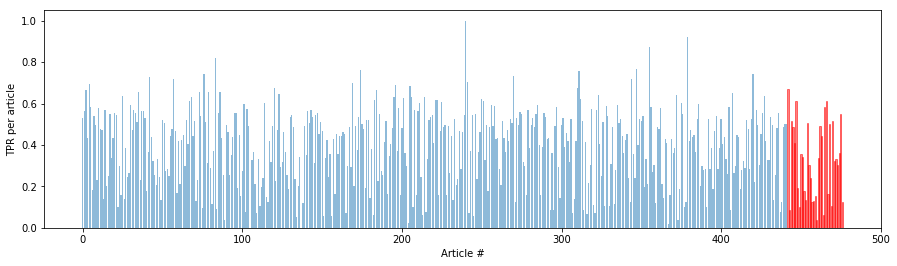

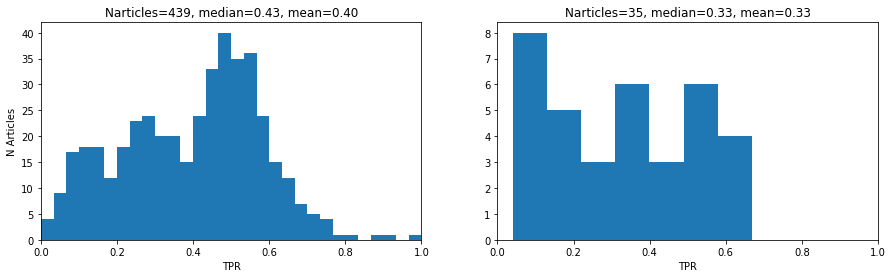

In [38]:
myvar = TPR0
varname = 'TPR'

# Plot bargraph
plotbar_train_dev2(myvar,Ntrain,Ndev,ylabel='{} per article'.format(varname),xlabel='Article #')

# # # Plot the histogram without containing any bads
# myvar without the bad articles
myvar2 = [tp for i, tp in enumerate(myvar) if i not in abads]

# Plot the histogram
ax = plothist_train_dev2(myvar2,Ntrain-Ntrain_bad,Ndev-Ndev_bad,xlabel=varname,ylabel='N Articles',devbins='auto')
set(ax['ax1'].set_xlim(0,1));
set(ax['ax2'].set_xlim(0,1));



## Plot FPR

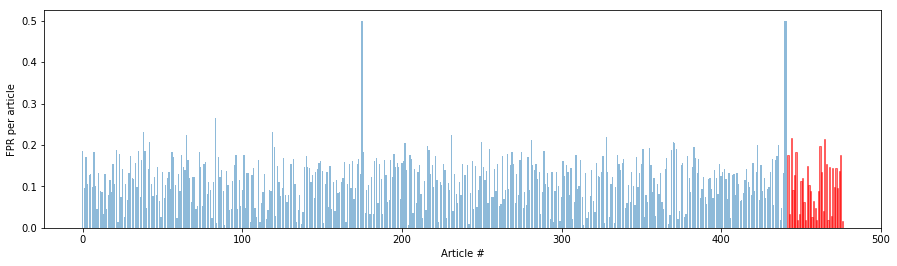

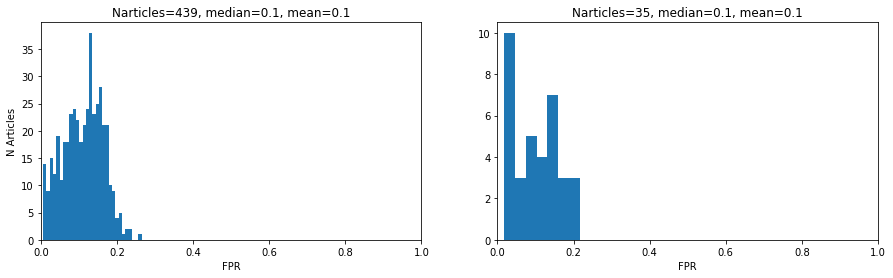

In [28]:
myvar = FPR0
varname = 'FPR'

# Plot bargraph
plotbar_train_dev2(myvar,Ntrain,Ndev,ylabel='{} per article'.format(varname),xlabel='Article #')

# # # Plot the histogram without containing any bads
# myvar without the bad articles
myvar2 = [tp for i, tp in enumerate(myvar) if i not in abads]

# Plot the histogram
ax = plothist_train_dev2(myvar2,Ntrain-Ntrain_bad,Ndev-Ndev_bad,xlabel=varname,ylabel='N Articles',devbins='auto')
set(ax['ax1'].set_xlim(0,1));
set(ax['ax2'].set_xlim(0,1));



## Plot True positives per sentence

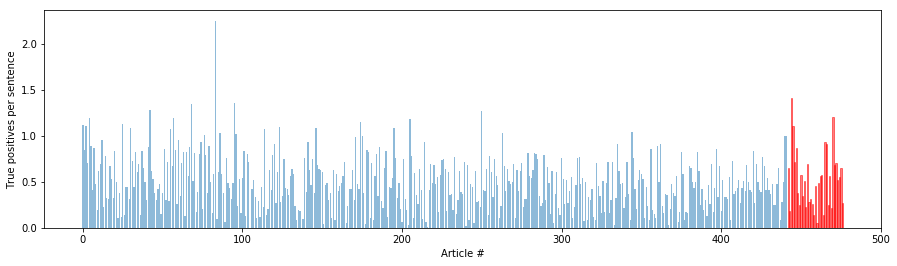

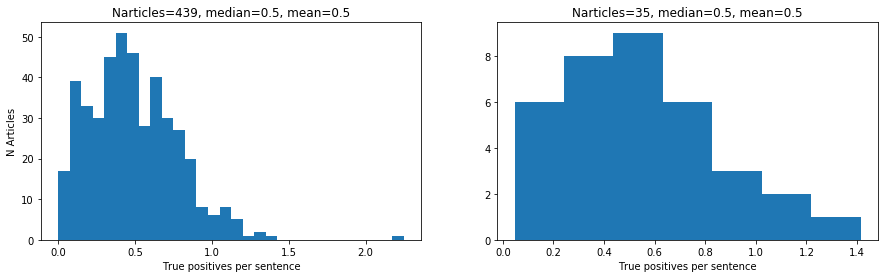

In [32]:
myvar = TPpersent0
varname = 'True positives per sentence'

# Plot bargraph
plotbar_train_dev2(myvar,Ntrain,Ndev,ylabel='{}'.format(varname),xlabel='Article #')

# # # Plot the histogram without containing any bads
# myvar without the bad articles
myvar2 = [tp for i, tp in enumerate(myvar) if i not in abads]

# Plot the histogram
ax = plothist_train_dev2(myvar2,Ntrain-Ntrain_bad,Ndev-Ndev_bad,xlabel=varname,ylabel='N Articles',devbins='auto')
# set(ax['ax1'].set_xlim(0,1));
# set(ax['ax2'].set_xlim(0,1));



## Plot False positives per sentence

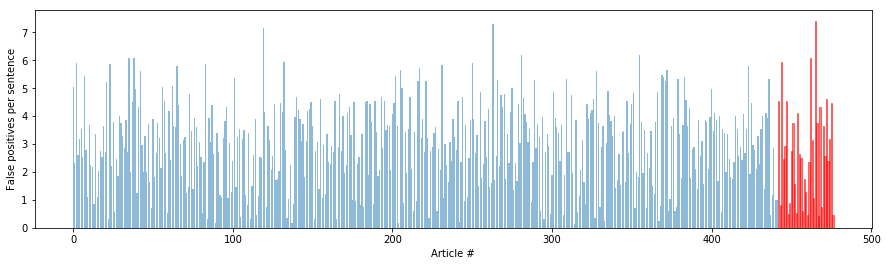

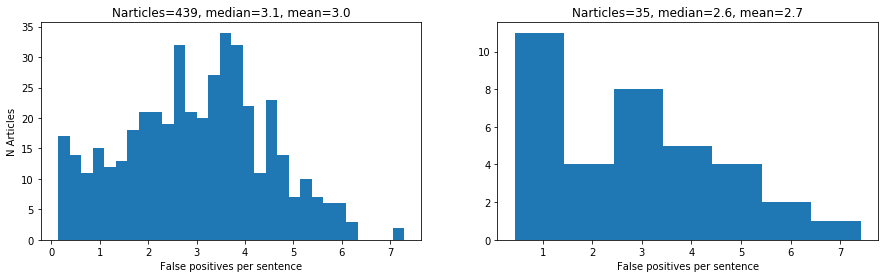

In [33]:
myvar = FPpersent0
varname = 'False positives per sentence'

# Plot bargraph
plotbar_train_dev2(myvar,Ntrain,Ndev,ylabel='{}'.format(varname),xlabel='Article #')

# # # Plot the histogram without containing any bads
# myvar without the bad articles
myvar2 = [tp for i, tp in enumerate(myvar) if i not in abads]

# Plot the histogram
ax = plothist_train_dev2(myvar2,Ntrain-Ntrain_bad,Ndev-Ndev_bad,xlabel=varname,ylabel='N Articles',devbins='auto')
# set(ax['ax1'].set_xlim(0,1));
# set(ax['ax2'].set_xlim(0,1));



# All paragraphs - compare blanks

In [34]:
# Initialize stuff
TPR0 = []
FPR0 = []
ACC0 = []
Nsentences0 = []
TP0 = []
FP0 = []
TPpersent0 = []
FPpersent0 = []
abads = []

art = arts[:]


# Only track true positives and false positive to avoid having to deal with other annoying edge cases
i=-1
k=-1
Ntrainp = 0
Ndevp=0
for a in art:
    i=i+1
    j=-1
    for p in a['paragraphs']:
        j=j+1
        k=k+1
        if i < Ntrain: Ntrainp=Ntrainp+1;
        else: Ndevp = Ndevp+1
        # AllenNLP results
        words = [w for w in p['allenNER']['words'].split()]
        tags = [t for t in p['allenNER']['tags'].split()]
        tags = [not t == 'O' for t in tags]   # Convert to binary

        # Ground truth
        blank_classification = [bc for bc in p['blank_classification']]
        blank_classification = [b == 1 for b in blank_classification] # Convert to binary

        Nsentences2 = len(text2sentences(words2text(words)))

        sbc = sum(blank_classification)
        st = sum(tags)
        if sbc == 0:
            #print("Warning article {}, paragraph P{} contains {} ground truth blanks and {} tags. Likely bad".format(str(i),str(j),str(sbc),str(st)))

            # Make up some dummy values so don't confuse for a REAL outlier in plots. Should just drop this data in the future
            # This is ok because we'll skip them later if want to do stats - that's what bads is for
            TPR = 0.5
            FPR = 0.5
            ACC = 0.5
            TP = 100
            FP = 100
            TPpersent = 1
            FPpersent = 1
            abads.append(k)       # kth paragraph is bad
        else:
            TP = sum([b and t for b,t in zip(blank_classification,tags)])
            FP = sum([not b and t for b,t in zip(blank_classification,tags)])
            FN = sum([b and not t for b,t in zip(blank_classification,tags)])
            TN = sum([not b and not t for b,t in zip(blank_classification,tags)])
#             ACC = (TP+TN)/(TP+FP+FN+TN)
            ACC = sum([b == t for b,t in zip(blank_classification,tags)]) / len(tags)

            # Sensitivity, hit rate, recall, or true positive rate
            TPR = TP/(TP+FN)
#             # Specificity or true negative rate
#             TNR = TN/(TN+FP) 
#             # Precision or positive predictive value
#             PPV = TP/(TP+FP)
#             # Negative predictive value
#             NPV = TN/(TN+FN)
#             # Fall out or false positive rate
#             FPR = FP/(FP+TN)
            # False negative rate
            FNR = FN/(TP+FN)
#             # False discovery rate
#             FDR = FP/(TP+FP)

            # Per sententance values
            TPpersent = TP / Nsentences2
            FPpersent = FP / Nsentences2
    
        TPR0.append(TPR)
        FPR0.append(FPR)
        ACC0.append(ACC)
        TP0.append(TP)
        FP0.append(FP)
        TPpersent0.append(TPpersent)
        FPpersent0.append(FPpersent)



In [35]:
# # # Plot the histogram without containing any bads


# Choose variable
myvar0 = TPR0

# myvar without the bad articles
myvar = [tp for i, tp in enumerate(myvar0) if i not in abads]

# Calculate how this affects Ntrain / Ndev
Ntrainp_bad = len([b for b in abads if b < Ntrainp])
Ndevp_bad = len([b for b in abads if b >= Ntrainp])


In [36]:
print(Ntrainp)
print(Ndevp)
print(Ntrainp_bad)
print(Ndevp_bad)



19035
1204
1383
13


## Plot TPR

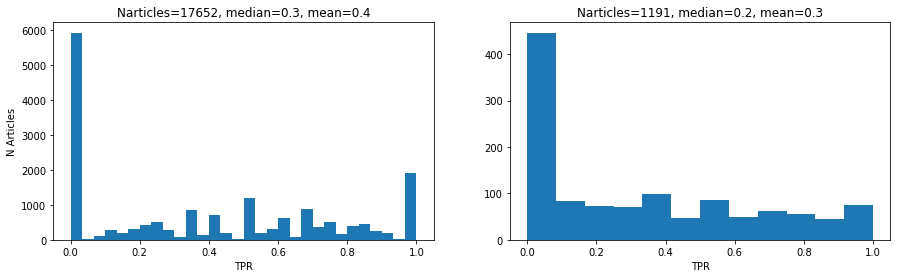

In [39]:
myvar = TPR0
varname = 'TPR'

# Plot bargraph (Don't plot figure for each paragraph!)
# plotbar_train_dev2(myvar,Ntrain,Ndev,ylabel='{}'.format(varname),xlabel='Article #')

# # # Plot the histogram without containing any bads
# myvar without the bad articles
myvar2 = [tp for i, tp in enumerate(myvar) if i not in abads]

# Plot the histogram
ax = plothist_train_dev2(myvar2,Ntrainp-Ntrainp_bad,Ndevp-Ndevp_bad,xlabel=varname,ylabel='N Articles',devbins='auto')
# set(ax['ax1'].set_xlim(0,1));
# set(ax['ax2'].set_xlim(0,1));



## Plot FPR

Not sure what's wrong here

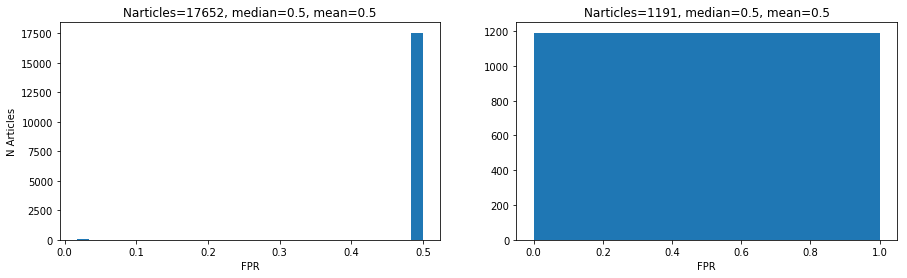

In [40]:
myvar = FPR0
varname = 'FPR'

# Plot bargraph (Don't plot figure for each paragraph!)
# plotbar_train_dev2(myvar,Ntrain,Ndev,ylabel='{}'.format(varname),xlabel='Article #')

# # # Plot the histogram without containing any bads
# myvar without the bad articles
myvar2 = [tp for i, tp in enumerate(myvar) if i not in abads]

# Plot the histogram
ax = plothist_train_dev2(myvar2,Ntrainp-Ntrainp_bad,Ndevp-Ndevp_bad,xlabel=varname,ylabel='N Articles',devbins='auto')
# set(ax['ax1'].set_xlim(0,1));
# set(ax['ax2'].set_xlim(0,1));



## Plot TP per sentence

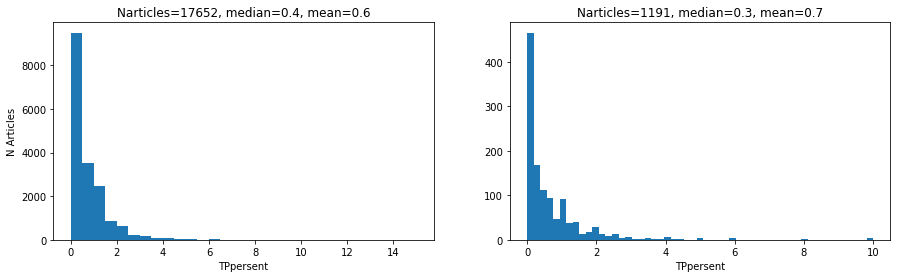

In [41]:
myvar = TPpersent0
varname = 'TPpersent'

# Plot bargraph (Don't plot figure for each paragraph!)
# plotbar_train_dev2(myvar,Ntrain,Ndev,ylabel='{}'.format(varname),xlabel='Article #')

# # # Plot the histogram without containing any bads
# myvar without the bad articles
myvar2 = [tp for i, tp in enumerate(myvar) if i not in abads]

# Plot the histogram
ax = plothist_train_dev2(myvar2,Ntrainp-Ntrainp_bad,Ndevp-Ndevp_bad,xlabel=varname,ylabel='N Articles',devbins='auto')
# set(ax['ax1'].set_xlim(0,1));
# set(ax['ax2'].set_xlim(0,1));

